In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interact_manual

In [5]:
image = cv2.imread("/content/drive/MyDrive/lowcont2.jpeg",0)

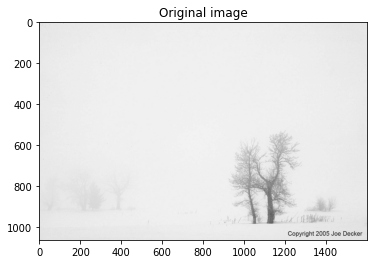

In [6]:
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.show()

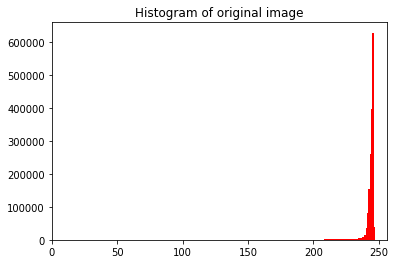

In [7]:
#Histogram for the image
hist,bins = np.histogram(image.flatten(),256,[0,256])
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Histogram of original image')
plt.show()

Looking at the histogram, it can be seen that the pixel values are nowhere near evenly distributed

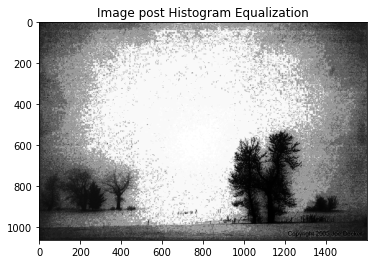

In [8]:
#Performing histogram equalization
equalized_img = cv2.equalizeHist(image)
# plt.imshow(cv2.cvtColor(equalized_img,cv2.COLOR_BGR2RGB))
plt.imshow(equalized_img,cmap='gray')
plt.title('Image post Histogram Equalization')
plt.show()

Although the contrast has now improved, the process also introduced a lot of noise in the image. This is where CLAHE comes in

In [9]:
#Contrast Limited Adaptive Histogram Equalization. The clip limit and the tile grid size can be set interactively
def interactive_clahe(clip_value,tile_value):   
    clahe = cv2.createCLAHE(clipLimit=clip_value, tileGridSize=(tile_value,tile_value))
    equalized_clahe = clahe.apply(image)
    plt.imshow(equalized_clahe,cmap = 'gray')
    plt.title('Image post CLAHE')
    return equalized_clahe

interact(interactive_clahe,clip_value=(1,10),tile_value=(1,64,1))

interactive(children=(IntSlider(value=5, description='clip_value', max=10, min=1), IntSlider(value=32, descrip…

<function __main__.interactive_clahe>

[[218 218 213 ... 213 213 213]
 [218 218 218 ... 220 220 220]
 [218 218 218 ... 227 227 227]
 ...
 [208 208 213 ... 218 218 218]
 [208 208 213 ... 218 218 218]
 [208 213 213 ... 218 218 218]]


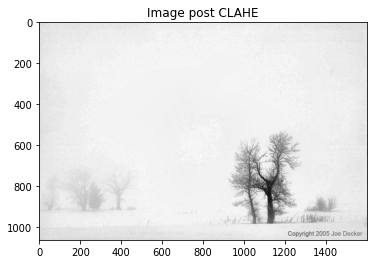

In [10]:
equalized_clahe = interactive_clahe(6,8)
print(equalized_clahe)

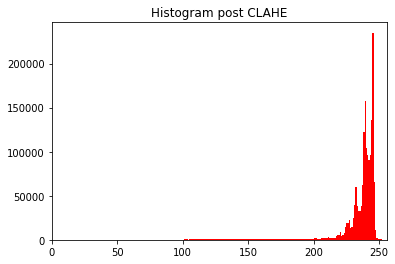

In [11]:
equalized_clahe = np.asarray(equalized_clahe)
hist_clahe,bins_clahe = np.histogram(equalized_clahe.flatten(),256,[0,256])
plt.hist(equalized_clahe.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Histogram post CLAHE')
plt.show()

The image contrast is now enhanced, and the trees on the left, which were barely visible in the original image, are now more visible. The histogram above also shows how the pixels are more distributed than in the original image

Text(0.5, 1.0, 'Post CLAHE')

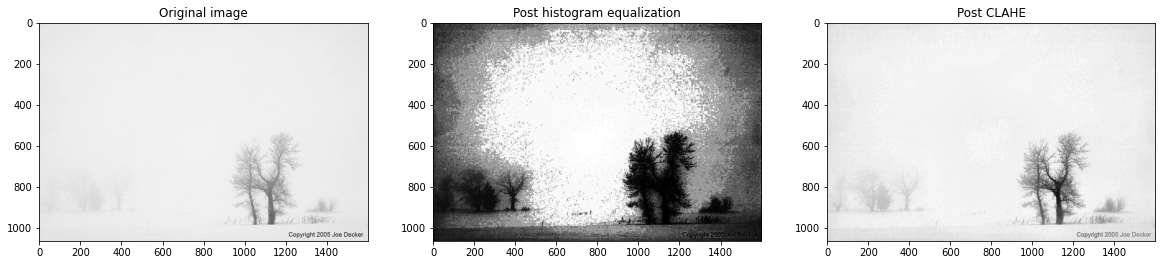

In [12]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(image,cmap='gray')
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(equalized_img,cmap='gray')
plt.title('Post histogram equalization')

plt.subplot(1,3,3)
plt.imshow(equalized_clahe,cmap='gray')
plt.title('Post CLAHE')